In [87]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [88]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [89]:
inputs = df.drop('CustomerID',axis='columns')
target = df.Gender
inputs.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [91]:
inputs = inputs.drop('Gender',axis='columns')
inputs.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [93]:
dummies = pd.get_dummies(target)
dummies.head(4)

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0


In [96]:
outputs=pd.concat([inputs,dummies],axis='columns')
outputs.head(4)

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0


Text(0, 0.5, 'Spending Score (1-100)')

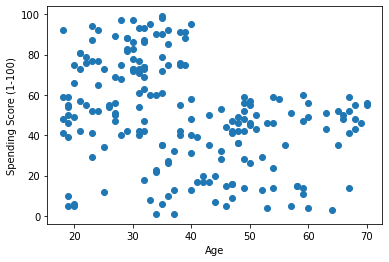

In [97]:
plt.scatter(outputs.Age,outputs['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

Text(0, 0.5, 'Annual Income (k$)')

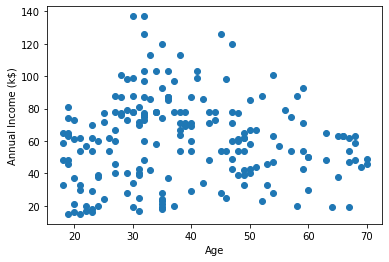

In [98]:
plt.scatter(outputs.Age,outputs['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# K means for age x spending score

In [99]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(outputs[['Age','Spending Score (1-100)']])
y_predicted

array([1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [103]:
outputs['cluster']=y_predicted
outputs.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male,cluster
0,19,15,39,0,1,1
1,21,15,81,0,1,1
2,20,16,6,1,0,1
3,23,16,77,1,0,1
4,31,17,40,1,0,1


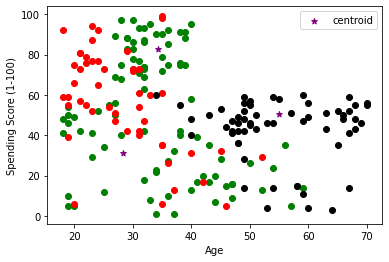

In [106]:
outputs1 = df[outputs.cluster==0]
outputs2 = df[outputs.cluster==1]
outputs3 = df[outputs.cluster==2]
plt.scatter(outputs1.Age,outputs1['Spending Score (1-100)'],color='green')
plt.scatter(outputs2.Age,outputs2['Spending Score (1-100)'],color='red')
plt.scatter(outputs3.Age,outputs3['Spending Score (1-100)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [109]:
scaler = MinMaxScaler()

scaler.fit(outputs[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(outputs[['Spending Score (1-100)']])

scaler.fit(outputs[['Age']])
df['Age'] = scaler.transform(outputs[['Age']])

In [110]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,15,0.387755
1,2,Male,0.057692,15,0.816327
2,3,Female,0.038462,16,0.051020
3,4,Female,0.096154,16,0.775510
4,5,Female,0.250000,17,0.397959


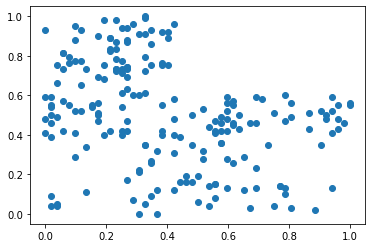

In [112]:
plt.scatter(df.Age,df['Spending Score (1-100)'])

In [114]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Spending Score (1-100)']])
y_predicted

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [115]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,15,0.387755,1
1,2,Male,0.057692,15,0.816327,2
2,3,Female,0.038462,16,0.051020,1
3,4,Female,0.096154,16,0.775510,2
4,5,Female,0.250000,17,0.397959,1


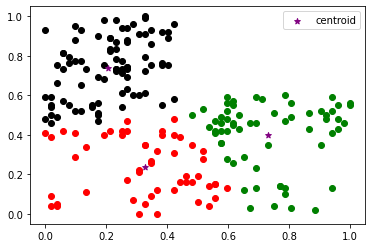

In [116]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Spending Score (1-100)'],color='green')
plt.scatter(df2.Age,df2['Spending Score (1-100)'],color='red')
plt.scatter(df3.Age,df3['Spending Score (1-100)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [119]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\Users\nupur srivastava\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


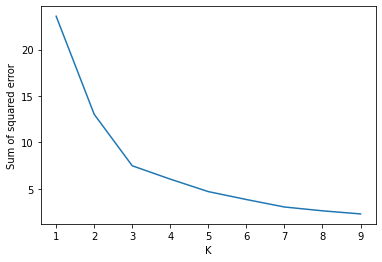

In [139]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# K means for age x annual income

In [124]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(outputs[['Age','Annual Income (k$)']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [126]:
outputs['cluster']=y_predicted
outputs.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male,cluster
0,19,15,39,0,1,2
1,21,15,81,0,1,2
2,20,16,6,1,0,2
3,23,16,77,1,0,2
4,31,17,40,1,0,2


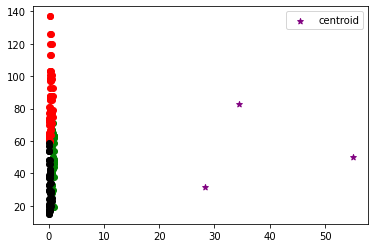

In [127]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Annual Income (k$)'],color='green')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='red')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [129]:
scaler = MinMaxScaler()

scaler.fit(outputs[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(outputs[['Annual Income (k$)']])

scaler.fit(outputs[['Age']])
df['Age'] = scaler.transform(outputs[['Age']])

In [130]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,2
1,2,Male,0.057692,0.000000,0.816327,2
2,3,Female,0.038462,0.008197,0.051020,2
3,4,Female,0.096154,0.008197,0.775510,2
4,5,Female,0.250000,0.016393,0.397959,2


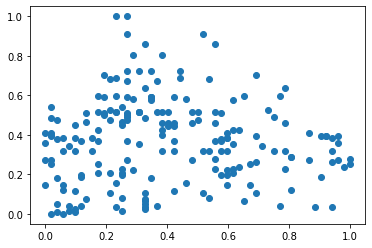

In [131]:
plt.scatter(df.Age,df['Annual Income (k$)'])

In [132]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Annual Income (k$)']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [133]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,2
1,2,Male,0.057692,0.000000,0.816327,2
2,3,Female,0.038462,0.008197,0.051020,2
3,4,Female,0.096154,0.008197,0.775510,2
4,5,Female,0.250000,0.016393,0.397959,2


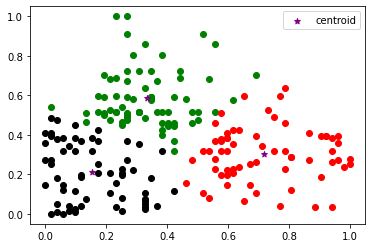

In [134]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Annual Income (k$)'],color='green')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='red')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [137]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Annual Income (k$)']])
    sse.append(km.inertia_)

C:\Users\nupur srivastava\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


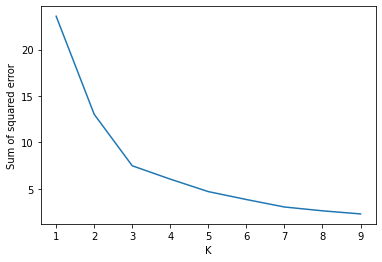

In [138]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)